## Import des bibliothèques utiles

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from scipy.stats import linregress

## Import des datasets

In [ ]:
# All interactions
df_all_interactions = pd.read_csv("/content/Copy of MessageAnalysis - Dataset compilation - All interactions.csv")
df_all_interactions_bis = df_all_interactions.copy()
# Users
df_users = pd.read_csv("/content/Copy of MessageAnalysis - Dataset compilation - Users bis.csv")
df_users_bis = df_users.copy()
# Users per group
df_users_per_group = pd.read_csv("/content/Copy of MessageAnalysis - Dataset compilation - users per groups.csv")
df_users_per_group_bis = df_users_per_group.copy()
# Users per tribe
df_users_per_tribe = pd.read_csv("/content/Copy of MessageAnalysis - Dataset compilation - users per tribe.csv")
df_users_per_tribe_bis = df_users_per_tribe.copy()
# Companies
df_companies = pd.read_csv("/content/Copy of MessageAnalysis - Dataset compilation - companies data.csv")
df_companies_bis = df_companies.copy()

NameError: ignored

## Visualisation des datasets

*5 premières lignes*

In [ ]:
df_users_per_group_test.head()

,lowest_level_id,level_0_id,level_1_id,quarter,month,year_month,month_rank,registered,Name,Total Employees,...,Company_Language,Max Potential Users,interactions_per_month,posts_per_month,comments_per_month,reactions_per_month,distinct_users_per_month,users+2_interactions,is_active,consecutive_active_months
0,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q1,2022-01,2022-01-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q1,2022-02,2022-02-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q1,2022-03,2022-03-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q2,2022-04,2022-04-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q2,2022-05,2022-05-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0


*Tout le dataset*

In [ ]:
print(df_users_per_group_test)

*Affiche des informations sur les données d'un dataframe, telles que le nombre de valeurs non nulles, le type de données de chaque colonne, etc.*

In [ ]:
df_users_per_group_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121263 entries, 0 to 121262
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   lowest_level_id            121263 non-null  object 
 1   level_0_id                 121263 non-null  object 
 2   level_1_id                 121263 non-null  object 
 3   quarter                    121263 non-null  object 
 4   month                      121263 non-null  object 
 5   year_month                 121263 non-null  object 
 6   month_rank                 121263 non-null  int64  
 7   registered                 121263 non-null  int64  
 8   Name                       121263 non-null  object 
 9   Total Employees            121263 non-null  object 
 10  Account Category           121263 non-null  object 
 11  Total registered users     121263 non-null  object 
 12  Company_Language           121263 non-null  object 
 13  Max Potential Users        12

*fournit des statistiques descriptives sur les colonnes numériques d'un dataframe, telles que la moyenne, l'écart-type, les quartiles, etc.*

In [ ]:
df_users_per_group_test.describe()

*Dimensions du dataset*

In [ ]:
df_users_per_group_test.shape

(121263, 22)

*Colonnes du dataset*

In [ ]:
df_users_per_group_test.columns

*Nombre de fois qu'une valeur apparaît dans une colonne*

In [ ]:
df_users_per_group_test["Name"].value_counts()["No_data"]/df_users_per_group_test.shape[0]

0.08714117249284613

*Nombre de valeurs nulles par colonne*

In [ ]:
#df_users_per_tribe_test.isnull().sum()
df_users_per_tribe_test.shape
#df_users_per_tribe_test['level_0_id'].value_counts()['no_level_0_found']

(11378, 13)

*Visualisation d'une ligne en particulier*

In [ ]:
df_users_per_group_test.iloc[85]

lowest_level_id              59ca44b40da688f1ac5caae8
level_0_id                   586a5fc47842e79091a53bb5
level_1_id                   5e14a5f9ce521d9833c5dbff
quarter                                       2023-Q1
month                                         2023-01
year_month                        2023-01-01 00:00:00
month_rank                                          1
registered                                          8
Name                                     Sport Heroes
Total Employees                                    90
Account Category                                  SMB
Total registered users                            143
Company_Language                                   FR
Max Potential Users                               250
interactions_per_month                            4.0
posts_per_month                                   2.0
comments_per_month                                2.0
reactions_per_month                               0.0
distinct_users_per_month    

## Formatage des datasets (type, colonnes etc)

In [ ]:
# All interactions
df_all_interactions_bis = df_all_interactions_bis.assign(group_id=pd.Series([None]*len(df_all_interactions_bis)), level_0_id=pd.Series([None]*len(df_all_interactions_bis)))
df_all_interactions_bis['Date'] = pd.to_datetime(df_all_interactions_bis['Date'])
df_all_interactions_bis['year_month'] = pd.to_datetime(df_all_interactions_bis['year_month'])
# Users
df_users_bis['deleted_at'] = df_users_bis['deleted_at'].fillna('2100-01-01')
df_users_bis['deleted_at'] = pd.to_datetime(df_users_bis['deleted_at'])
df_users_bis['created_at'] = pd.to_datetime(df_users_bis['created_at'])
# Users per group
df_users_per_group_bis['year_month'] = pd.to_datetime(df_users_per_group_bis['year_month'])
# Users per tribe
df_users_per_tribe_bis['year_month'] = pd.to_datetime(df_users_per_tribe_bis['year_month'])

## Attribution d'un group_id et d'un level_0_id à chaque interaction

In [ ]:
# Recherche du group_id correspondant à chaque interaction
def get_group_id(user_id, date):
    user_rows = df_users_bis[df_users_bis["user_id"] == user_id]
    if len(user_rows) == 0:
        return "no_group_found"
    elif len(user_rows) == 1:
        row = user_rows.iloc[0]
        if row["created_at"] <= date and row["deleted_at"] >= date:
            return row["lowest_level_id"]
        else:
            return "no_group_found"
    else:
        valid_rows = user_rows[(user_rows["created_at"] <= date) & ((user_rows["deleted_at"] >= date) | (user_rows["deleted_at"] == "2100-01-01"))]
        if len(valid_rows) == 0:
            return "no_group_found"
        else:
            durations = pd.to_datetime(valid_rows["deleted_at"]) - pd.to_datetime(valid_rows["created_at"])
            idx = np.argmax(durations)
            return valid_rows.iloc[idx]["lowest_level_id"]

# Application de la fonction à chaque interaction
df_all_interactions_bis["group_id"] = df_all_interactions_bis.apply(lambda x: get_group_id(x["Distinct ID"], x["Date"]), axis=1)

In [ ]:
# Recherche du level_0_id correspondant à chaque interaction
def get_level_0_id(group_id):
    if group_id == 'no_group_found':
        return "no_level_0_found"
    else :
      group_rows = df_users_per_group_bis[df_users_per_group_bis["lowest_level_id"] == group_id]
      if len(group_rows) == 0 :
        return "no_level_0_found"
      else :
        row = group_rows.iloc[0]
        return row["level_0_id"]

    #else :
    #  group_rows = df_users_per_group_bis[df_users_per_group_bis["lowest_level_id"] == level_0_id]
    #  if len(group_rows) == 0:
    #      return "no_level_0_found"
    #  else:
    #      row = group_rows.iloc[0]
    #      return row["level_0_id"]

# Application de la fonction à chaque interaction
df_all_interactions_bis["level_0_id"] = df_all_interactions_bis.apply(lambda x: get_level_0_id(x["group_id"]), axis=1)

In [ ]:
#Recherche du level_0_id correspondant à chaque tribe
def level_0_tribe(tribe_id) :
  tribe_rows = df_all_interactions_bis[df_all_interactions_bis["tribeId"] == tribe_id]
  if len(tribe_rows) == 0 :
    return "no_level_0_found"
  else :
    for i in range (tribe_rows.shape[0]):
      if tribe_rows.iloc[i,8] == "no_level_0_found" :
        i=i+1
      else :
        return tribe_rows.iloc[i,8]
    return "no_level_0_found"
df_users_per_tribe_bis["level_0_id"] = df_users_per_tribe_bis.apply(lambda x : level_0_tribe(x["tribeId"]), axis=1)

## Copie des dataframes afin d'éviter des temps d'exécution trop longs

In [ ]:
"""# On télécharge carrément les résultats ici, ainsi plus besoin d'exécuter la 1ère partie du code, à moins que l'on change le dataset
df_all_interactions_bis.to_csv('to_analyse_interactions.csv', index=False)
df_users_per_group_bis.to_csv('to_analyse_groups.csv', index=False)
df_users_per_tribe_bis.to_csv('to_analyse_tribes.csv', index=False)
df_companies_bis.to_csv('to_analyse_companies.csv', index=False)
files.download('to_analyse_interactions.csv')
files.download('to_analyse_groups.csv')
files.download('to_analyse_tribes.csv')
files.download('to_analyse_companies.csv')"""

"# On télécharge carrément les résultats ici, ainsi plus besoin d'exécuter la 1ère partie du code, à moins que l'on change le dataset\ndf_all_interactions_bis.to_csv('to_analyse_interactions.csv', index=False)\ndf_users_per_group_bis.to_csv('to_analyse_groups.csv', index=False)\ndf_users_per_tribe_bis.to_csv('to_analyse_tribes.csv', index=False)\ndf_companies_bis.to_csv('to_analyse_companies.csv', index=False)\nfiles.download('to_analyse_interactions.csv')\nfiles.download('to_analyse_groups.csv')\nfiles.download('to_analyse_tribes.csv')\nfiles.download('to_analyse_companies.csv')"

In [ ]:
# On ouvre les csv (qui sont donc à ajouter à l'environnement de travail au préalable)
df_all_interactions_test = pd.read_csv("/content/to_analyse_interactions.csv")
df_users_per_group_test = pd.read_csv("/content/to_analyse_groups.csv")
df_users_per_tribe_test = pd.read_csv("/content/to_analyse_tribes.csv")
df_companies_test = pd.read_csv("/content/to_analyse_companies.csv")

In [ ]:
# On ajoute les informations de l'entreprise pour chaque groupe
df_merged = pd.merge(df_users_per_group_test, df_companies_test, how='left', left_on='level_0_id', right_on='Id')
# On remplace les valeurs manquantes par "No_data"
df_merged.fillna("No_data", inplace=True)
# On supprime la colonne en double
df_merged.drop(['Id'], axis=1, inplace=True)
df_users_per_group_test = df_merged.copy()

# Pareil pour les clubs
df_merged = pd.merge(df_users_per_tribe_test, df_companies_test, how='left', left_on='level_0_id', right_on='Id')
# On remplace les valeurs manquantes par "No_data"
df_merged.fillna("No_data", inplace=True)
# On supprime la colonne en double
df_merged.drop(['Id'], axis=1, inplace=True)
df_users_per_tribe_test = df_merged.copy()

## Comptage du nombre d'interactions, pour chaque groupe et pour chaque mois

*Ajout de toutes les interactions*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'group'
df_all_interactions_group = df_all_interactions_test.query("feedType == 'group'")

# Regrouper les interactions par groupe et mois, et compter le nombre d'interactions pour chaque groupe et mois
interactions_per_group_month = df_all_interactions_group.groupby(['group_id', 'year_month']).size().reset_index(name='interactions_per_month')

# Fusionner les données des interactions par groupe et mois dans le dataframe des utilisateurs par groupe et mois
df_users_per_group_test = pd.merge(df_users_per_group_test, interactions_per_group_month, how='left', left_on=['lowest_level_id', 'year_month'], right_on=['group_id', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_group_test['interactions_per_month'] = df_users_per_group_test['interactions_per_month'].fillna(0)

# Supprimer la colonne 'group_id'
df_users_per_group_test = df_users_per_group_test.drop('group_id', axis=1)

*Ajout des posts*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'group' & 'interactionType est 'post'
df_all_posts_group = df_all_interactions_test.query("feedType == 'group' & interactionType == 'post'")

# Regrouper les posts par groupe et mois, et compter le nombre de posts pour chaque groupe et mois
posts_per_group_month = df_all_posts_group.groupby(['group_id', 'year_month']).size().reset_index(name='posts_per_month')

# Fusionner les données des posts par groupe et mois dans le dataframe des utilisateurs par groupe et mois
df_users_per_group_test = pd.merge(df_users_per_group_test, posts_per_group_month, how='left', left_on=['lowest_level_id', 'year_month'], right_on=['group_id', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_group_test['posts_per_month'] = df_users_per_group_test['posts_per_month'].fillna(0)

# Supprimer la colonne 'group_id'
df_users_per_group_test = df_users_per_group_test.drop('group_id', axis=1)

*Ajout des commentaires*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'group' & 'interactionType est 'comment'
df_all_comments_group = df_all_interactions_test.query("feedType == 'group' & interactionType == 'comment'")

# Regrouper les comments par groupe et mois, et compter le nombre de comments pour chaque groupe et mois
comments_per_group_month = df_all_comments_group.groupby(['group_id', 'year_month']).size().reset_index(name='comments_per_month')

# Fusionner les données des comments par groupe et mois dans le dataframe des utilisateurs par groupe et mois
df_users_per_group_test = pd.merge(df_users_per_group_test, comments_per_group_month, how='left', left_on=['lowest_level_id', 'year_month'], right_on=['group_id', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_group_test['comments_per_month'] = df_users_per_group_test['comments_per_month'].fillna(0)

# Supprimer la colonne 'group_id'
df_users_per_group_test = df_users_per_group_test.drop('group_id', axis=1)

*Ajout des réactions*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'group' & 'interactionType est 'reaction'
df_all_reactions_group = df_all_interactions_test.query("feedType == 'group' & interactionType == 'reaction'")

# Regrouper les reactions par groupe et mois, et compter le nombre de reactions pour chaque groupe et mois
reactions_per_group_month = df_all_reactions_group.groupby(['group_id', 'year_month']).size().reset_index(name='reactions_per_month')

# Fusionner les données des reactions par groupe et mois dans le dataframe des utilisateurs par groupe et mois
df_users_per_group_test = pd.merge(df_users_per_group_test, reactions_per_group_month, how='left', left_on=['lowest_level_id', 'year_month'], right_on=['group_id', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_group_test['reactions_per_month'] = df_users_per_group_test['reactions_per_month'].fillna(0)

# Supprimer la colonne 'group_id'
df_users_per_group_test = df_users_per_group_test.drop('group_id', axis=1)

*Ajout du pourcentage de membres interagissant*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'group'
df_all_interactions_group = df_all_interactions_test.query("feedType == 'group'")

# Regrouper les interagisseurs par groupe et mois, et compter leur nombre pour chaque groupe et mois
interactors_per_group_month = df_all_interactions_group.groupby(['group_id', 'year_month'])['Distinct ID'].nunique().reset_index(name='distinct_users_per_month')

# Fusionner les données des interagisseurs par groupe et mois dans le dataframe des utilisateurs par groupe et mois
df_users_per_group_test = pd.merge(df_users_per_group_test, interactors_per_group_month, how='left', left_on=['lowest_level_id', 'year_month'], right_on=['group_id', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_group_test['distinct_users_per_month'] = df_users_per_group_test['distinct_users_per_month'].fillna(0)

# Supprimer la colonne 'group_id'
df_users_per_group_test = df_users_per_group_test.drop('group_id', axis=1)

# Créer une fonction qui calcule le pourcentage de distinct_users_per_month par rapport à registered, arrondi à 1 chiffre après la virgule
def calculate_percentage(row):
    if row['registered'] == 0:
        return 0.0
    else:
        return round(row['distinct_users_per_month'] / row['registered'] * 100, 1)

# Appliquer la fonction à chaque ligne du dataframe
df_users_per_group_test['distinct_users_per_month'] = df_users_per_group_test.apply(calculate_percentage, axis=1)

*Ajout du nombre d'utilisateurs ayant interagi au moins 2 fois*

In [ ]:
df_all_interactions_group = df_all_interactions_test[df_all_interactions_test['feedType'] == 'group']
users_plus2_interactions_per_group_month = df_all_interactions_group.groupby(['group_id', 'year_month'])['Distinct ID'].apply(lambda x: x[x.duplicated()].unique().size).reset_index(name='users+2_interactions')
df_users_per_group_test = pd.merge(df_users_per_group_test, users_plus2_interactions_per_group_month, how='left', left_on=['lowest_level_id', 'year_month'], right_on=['group_id', 'year_month'])
df_users_per_group_test['users+2_interactions'] = df_users_per_group_test['users+2_interactions'].fillna(0)
df_users_per_group_test = df_users_per_group_test.drop('group_id', axis=1)

*Ajout de l'information permettant de juger si le groupe a été actif pour le mois considéré. La première approche a été la suivante :*

*Actif si >=20% utilisateurs interagissant & >=2 utilisateurs interagissant au moins 2 fois.*

*La deuxième approche est:*

*Actif si >=10% utilisateurs interagissant. C'est avec cette approche que nous allons continuer.*


In [ ]:
#df_users_per_group_test['is_active'] = ((df_users_per_group_test['distinct_users_per_month'] >= 20) & (df_users_per_group_test['users+2_interactions'] >= 2)).astype(int)
df_users_per_group_test['is_active'] = (df_users_per_group_test['distinct_users_per_month'] >= 10).astype(int)

*Visualisation d'une ligne dont on connaît les valeurs*

In [ ]:
print(df_users_per_group_test.iloc[73])

lowest_level_id             59ca44b40da688f1ac5caae8
level_0_id                  586a5fc47842e79091a53bb5
level_1_id                  5e14a5f9ce521d9833c5dbff
quarter                                      2022-Q1
month                                        2022-01
year_month                                2022-01-01
month_rank                                         1
registered                                         4
Name                                    Sport Heroes
Total Employees                                   90
Account Category                                 SMB
Total registered users                           143
Company_Language                                  FR
Max Potential Users                              250
interactions_per_month                           0.0
posts_per_month                                  0.0
comments_per_month                               0.0
reactions_per_month                              0.0
distinct_users_per_month                      

## Comptage du nombre d'interactions, pour chaque tribe et pour chaque mois

*Ajout de toutes les interactions*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'tribe'
df_all_interactions_tribe = df_all_interactions_test.query("feedType == 'tribe'")

# Regrouper les interactions par tribe et mois, et compter le nombre d'interactions pour chaque tribe et mois
interactions_per_tribe_month = df_all_interactions_tribe.groupby(['tribeId', 'year_month']).size().reset_index(name='interactions_per_month')

# Fusionner les données des interactions par tribe et mois dans le dataframe des utilisateurs par tribe et mois
df_users_per_tribe_test = pd.merge(df_users_per_tribe_test, interactions_per_tribe_month, how='left', left_on=['tribeId', 'year_month'], right_on=['tribeId', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_tribe_test['interactions_per_month'] = df_users_per_tribe_test['interactions_per_month'].fillna(0)

*Ajout des posts*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'tribe' & 'interactionType est 'post'
df_all_posts_tribe = df_all_interactions_test.query("feedType == 'tribe' & interactionType == 'post'")

# Regrouper les posts par tribe et mois, et compter le nombre de posts pour chaque tribe et mois
posts_per_tribe_month = df_all_posts_tribe.groupby(['tribeId', 'year_month']).size().reset_index(name='posts_per_month')

# Fusionner les données des posts par tribe et mois dans le dataframe des utilisateurs par tribe et mois
df_users_per_tribe_test = pd.merge(df_users_per_tribe_test, posts_per_tribe_month, how='left', left_on=['tribeId', 'year_month'], right_on=['tribeId', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_tribe_test['posts_per_month'] = df_users_per_tribe_test['posts_per_month'].fillna(0)

*Ajout des commentaires*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'tribe' & 'interactionType est 'comment'
df_all_comments_tribe = df_all_interactions_test.query("feedType == 'tribe' & interactionType == 'comment'")

# Regrouper les comments par tribe et mois, et compter le nombre de comments pour chaque tribe et mois
comments_per_tribe_month = df_all_comments_tribe.groupby(['tribeId', 'year_month']).size().reset_index(name='comments_per_month')

# Fusionner les données des comments par tribe et mois dans le dataframe des utilisateurs par tribe et mois
df_users_per_tribe_test = pd.merge(df_users_per_tribe_test, comments_per_tribe_month, how='left', left_on=['tribeId', 'year_month'], right_on=['tribeId', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_tribe_test['comments_per_month'] = df_users_per_tribe_test['comments_per_month'].fillna(0)

*Ajout des réactions*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'tribe' & 'interactionType est 'reaction'
df_all_reactions_tribe = df_all_interactions_test.query("feedType == 'tribe' & interactionType == 'reaction'")

# Regrouper les reactions par tribe et mois, et compter le nombre de reactions pour chaque tribe et mois
reactions_per_tribe_month = df_all_reactions_tribe.groupby(['tribeId', 'year_month']).size().reset_index(name='reactions_per_month')

# Fusionner les données des reactions par tribe et mois dans le dataframe des utilisateurs par tribe et mois
df_users_per_tribe_test = pd.merge(df_users_per_tribe_test, reactions_per_tribe_month, how='left', left_on=['tribeId', 'year_month'], right_on=['tribeId', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_tribe_test['reactions_per_month'] = df_users_per_tribe_test['reactions_per_month'].fillna(0)

*Ajout du pourcentage de membres interagissant*

In [ ]:
# Filtrer les interactions pour lesquelles 'feedType' est 'tribe'
df_all_interactions_tribe = df_all_interactions_test.query("feedType == 'tribe'")

# Regrouper les interagisseurs par tribe et mois, et compter leur nombre pour chaque tribe et mois
interactors_per_tribe_month = df_all_interactions_tribe.groupby(['tribeId', 'year_month'])['Distinct ID'].nunique().reset_index(name='distinct_users_per_month')

# Fusionner les données des interagisseurs par tribe et mois dans le dataframe des utilisateurs par tribe et mois
df_users_per_tribe_test = pd.merge(df_users_per_tribe_test, interactors_per_tribe_month, how='left', left_on=['tribeId', 'year_month'], right_on=['tribeId', 'year_month'])

# Remplacer les valeurs manquantes par 0
df_users_per_tribe_test['distinct_users_per_month'] = df_users_per_tribe_test['distinct_users_per_month'].fillna(0)

# Créer une fonction qui calcule le pourcentage de distinct_users_per_month par rapport à 'Monthly population for each tribe', arrondi à 1 chiffre après la virgule
def calculate_percentage(row):
    if row['Monthly population for each tribe'] == 0:
        return 0.0
    else:
        return round(row['distinct_users_per_month'] / row['Monthly population for each tribe'] * 100, 1)

# Appliquer la fonction à chaque ligne du dataframe
df_users_per_tribe_test['distinct_users_per_month'] = df_users_per_tribe_test.apply(calculate_percentage, axis=1)

*Ajout du nombre d'utilisateurs ayant interagi au moins 2 fois*

In [ ]:
df_all_interactions_tribe = df_all_interactions_test[df_all_interactions_test['feedType'] == 'tribe']
users_plus2_interactions_per_tribe_month = df_all_interactions_tribe.groupby(['tribeId', 'year_month'])['Distinct ID'].apply(lambda x: x[x.duplicated()].unique().size).reset_index(name='users+2_interactions')
df_users_per_tribe_test = pd.merge(df_users_per_tribe_test, users_plus2_interactions_per_tribe_month, how='left', left_on=['tribeId', 'year_month'], right_on=['tribeId', 'year_month'])
df_users_per_tribe_test['users+2_interactions'] = df_users_per_tribe_test['users+2_interactions'].fillna(0)
#df_users_per_tribe_test = df_users_per_group_test.drop('group_id', axis=1)

*Ajout de l'information permettant de juger si le groupe a été actif pour le mois considéré. La première approche a été la suivante :*

*Actif si >=20% utilisateurs interagissant & >=2 utilisateurs interagissant au moins 2 fois.*

*La deuxième approche est:*

*Actif si >=10% utilisateurs interagissant. C'est avec cette approche que nous allons continuer.*

In [ ]:
#df_users_per_tribe_test['is_active'] = ((df_users_per_tribe_test['distinct_users_per_month'] >= 20) & (df_users_per_tribe_test['users+2_interactions'] >= 2)).astype(int)
df_users_per_tribe_test['is_active'] = (df_users_per_tribe_test['distinct_users_per_month'] >= 10).astype(int)

*Visualisation d'une ligne dont on connaît les valeurs*

In [ ]:
print(df_users_per_tribe_test.iloc[138])

tribeId                              6245c59275e0751793b18f78
Date                                                 May 2022
year_month                                         2022-05-01
Monthly balance for each tribe                             15
Monthly population for each tribe                          53
level_0_id                           586a5fc47842e79091a53bb5
Name                                             Sport Heroes
Total Employees                                            90
Account Category                                          SMB
Total registered users                                    143
Company_Language                                           FR
Max Potential Users                                       250
interactions_per_month                                   22.0
posts_per_month                                           7.0
comments_per_month                                       15.0
reactions_per_month                                       0.0
distinct

## Evaluation de la continuité de l'activité des conversations

In [ ]:
"""# On trie dans l'ordre croissant les mois afin que le mois engendrant de la continuité
# soit celui avec le nombre le plus petit. Par exemple si groupe actif en janvier 2022 et les
# 5 mois suivants : la valeur pour janvier sera = 1 et celle pour juin sera = 6

## PAS LA TECHNIQUE PRIVILÉGIÉE

# 1. Trier le dataframe par 'lowest_level_id' et 'year_month'
df_users_per_group_test = df_users_per_group_test.sort_values(['lowest_level_id', 'year_month'])

# 2. Ajouter une colonne 'previous_is_active'
df_users_per_group_test['previous_is_active'] = df_users_per_group_test.groupby('lowest_level_id')['is_active'].shift(1)

# 3. Ajouter une colonne 'consecutive_active_months'
df_users_per_group_test['consecutive_active_months'] = 0

# 4. Itérer sur chaque ligne du dataframe pour calculer les mois consécutifs actifs
for group_id, group_df in df_users_per_group_test.groupby('lowest_level_id'):
    consecutive_active_months = 0
    for index, row in group_df.iterrows():
        if row['is_active'] == 1:
            consecutive_active_months += 1
        else:
            consecutive_active_months = 0
            if row['previous_is_active'] == 0:
                consecutive_active_months = 0
        df_users_per_group_test.at[index, 'consecutive_active_months'] = consecutive_active_months
df_users_per_group_test = df_users_per_group_test.drop('previous_is_active', axis=1)"""

"# On trie dans l'ordre croissant les mois afin que le mois engendrant de la continuité \n# soit celui avec le nombre le plus petit. Par exemple si groupe actif en janvier 2022 et les\n# 5 mois suivants : la valeur pour janvier sera = 1 et celle pour juin sera = 6\n\n## PAS LA TECHNIQUE PRIVILÉGIÉE\n\n# 1. Trier le dataframe par 'lowest_level_id' et 'year_month'\ndf_users_per_group_test = df_users_per_group_test.sort_values(['lowest_level_id', 'year_month'])\n\n# 2. Ajouter une colonne 'previous_is_active'\ndf_users_per_group_test['previous_is_active'] = df_users_per_group_test.groupby('lowest_level_id')['is_active'].shift(1)\n\n# 3. Ajouter une colonne 'consecutive_active_months'\ndf_users_per_group_test['consecutive_active_months'] = 0\n\n# 4. Itérer sur chaque ligne du dataframe pour calculer les mois consécutifs actifs\nfor group_id, group_df in df_users_per_group_test.groupby('lowest_level_id'):\n    consecutive_active_months = 0\n    for index, row in group_df.iterrows():\n      

In [ ]:
# On trie dans l'ordre décroissant les mois afin que le mois engendrant de la continuité
# soit celui avec le nombre le plus grand. Par exemple si groupe actif en janvier 2022 et les
# 5 mois suivants : la valeur pour janvier sera = 6 et celle pour juin sera = 1

## TECHNIQUE PRIVILÉGIÉE

# 1. Trier le dataframe par 'lowest_level_id' et 'year_month'
df_users_per_group_test = df_users_per_group_test.sort_values(['lowest_level_id', 'year_month'],ascending=[True,False])

# 2. Ajouter une colonne 'previous_is_active'
df_users_per_group_test['previous_is_active'] = df_users_per_group_test.groupby('lowest_level_id')['is_active'].shift(1)

# 3. Ajouter une colonne 'consecutive_active_months'
df_users_per_group_test['consecutive_active_months'] = 0

# 4. Itérer sur chaque ligne du dataframe pour calculer les mois consécutifs actifs
for group_id, group_df in df_users_per_group_test.groupby('lowest_level_id'):
    consecutive_active_months = 0
    for index, row in group_df.iterrows():
        if row['is_active'] == 1:
            consecutive_active_months += 1
        else:
            consecutive_active_months = 0
            if row['previous_is_active'] == 0:
                consecutive_active_months = 0
        df_users_per_group_test.at[index, 'consecutive_active_months'] = consecutive_active_months
df_users_per_group_test = df_users_per_group_test.drop('previous_is_active', axis=1)

# On retrie dans l'ordre croissant pour que ça soit plus joli et logique
df_users_per_group_test = df_users_per_group_test.sort_values(['lowest_level_id', 'year_month'],ascending=[True,True])

In [ ]:
"""# On trie dans l'ordre croissant les mois afin que le mois engendrant de la continuité
# soit celui avec le nombre le plus petit. Par exemple si club actif en janvier 2022 et les
# 5 mois suivants : la valeur pour janvier sera = 1 et celle pour juin sera = 6

## PAS LA TECHNIQUE PRIVILÉGIÉE

# 1. Trier le dataframe par 'tribeId' et 'year_month'
df_users_per_tribe_test = df_users_per_tribe_test.sort_values(['tribeId', 'year_month'])

# 2. Ajouter une colonne 'previous_is_active'
df_users_per_tribe_test['previous_is_active'] = df_users_per_tribe_test.groupby('tribeId')['is_active'].shift(1)

# 3. Ajouter une colonne 'consecutive_active_months'
df_users_per_tribe_test['consecutive_active_months'] = 0

# 4. Itérer sur chaque ligne du dataframe pour calculer les mois consécutifs actifs
for tribe_id, tribe_df in df_users_per_tribe_test.groupby('tribeId'):
    consecutive_active_months = 0
    for index, row in tribe_df.iterrows():
        if row['is_active'] == 1:
            consecutive_active_months += 1
        else:
            consecutive_active_months = 0
            if row['previous_is_active'] == 0:
                consecutive_active_months = 0
        df_users_per_tribe_test.at[index, 'consecutive_active_months'] = consecutive_active_months
df_users_per_tribe_test = df_users_per_tribe_test.drop('previous_is_active', axis=1)"""

"# On trie dans l'ordre croissant les mois afin que le mois engendrant de la continuité \n# soit celui avec le nombre le plus petit. Par exemple si club actif en janvier 2022 et les\n# 5 mois suivants : la valeur pour janvier sera = 1 et celle pour juin sera = 6\n\n## PAS LA TECHNIQUE PRIVILÉGIÉE\n\n# 1. Trier le dataframe par 'tribeId' et 'year_month'\ndf_users_per_tribe_test = df_users_per_tribe_test.sort_values(['tribeId', 'year_month'])\n\n# 2. Ajouter une colonne 'previous_is_active'\ndf_users_per_tribe_test['previous_is_active'] = df_users_per_tribe_test.groupby('tribeId')['is_active'].shift(1)\n\n# 3. Ajouter une colonne 'consecutive_active_months'\ndf_users_per_tribe_test['consecutive_active_months'] = 0\n\n# 4. Itérer sur chaque ligne du dataframe pour calculer les mois consécutifs actifs\nfor tribe_id, tribe_df in df_users_per_tribe_test.groupby('tribeId'):\n    consecutive_active_months = 0\n    for index, row in tribe_df.iterrows():\n        if row['is_active'] == 1:\n     

In [ ]:
# On trie dans l'ordre décroissant les mois afin que le mois engendrant de la continuité
# soit celui avec le nombre le plus grand. Par exemple si club actif en janvier 2022 et les
# 5 mois suivants : la valeur pour janvier sera = 6 et celle pour juin sera = 1

## TECHNIQUE PRIVILÉGIÉE

# 1. Trier le dataframe par 'tribeId' et 'year_month'
df_users_per_tribe_test = df_users_per_tribe_test.sort_values(['tribeId', 'year_month'],ascending=[True,False])

# 2. Ajouter une colonne 'previous_is_active'
df_users_per_tribe_test['previous_is_active'] = df_users_per_tribe_test.groupby('tribeId')['is_active'].shift(1)

# 3. Ajouter une colonne 'consecutive_active_months'
df_users_per_tribe_test['consecutive_active_months'] = 0

# 4. Itérer sur chaque ligne du dataframe pour calculer les mois consécutifs actifs
for tribe_id, tribe_df in df_users_per_tribe_test.groupby('tribeId'):
    consecutive_active_months = 0
    for index, row in tribe_df.iterrows():
        if row['is_active'] == 1:
            consecutive_active_months += 1
        else:
            consecutive_active_months = 0
            if row['previous_is_active'] == 0:
                consecutive_active_months = 0
        df_users_per_tribe_test.at[index, 'consecutive_active_months'] = consecutive_active_months
df_users_per_tribe_test = df_users_per_tribe_test.drop('previous_is_active', axis=1)

# On retrie dans l'ordre croissant pour que ça soit plus joli et logique
df_users_per_tribe_test = df_users_per_tribe_test.sort_values(['tribeId', 'year_month'],ascending=[True,True])

## Visualisation de certaines lignes afin de confirmer nos résultats

In [ ]:
# trouver l'index de la ligne avec la valeur maximale de la colonne 'consecutive_active_months'
idxmax = df_users_per_group_test['consecutive_active_months'].idxmax()

# sélectionner la première ligne correspondante en cas de plusieurs maximums
max_row = df_users_per_group_test.loc[[idxmax]].iloc[0]

# afficher la ligne correspondante
print(max_row)
#print(df_users_per_group_test.iloc[74])

In [ ]:
active_groups = df_users_per_group_test[(df_users_per_group_test['is_active']== 1) & (df_users_per_group_test['Account Category'] == 'Strategic')]
type_groups = df_users_per_group_test[df_users_per_group_test['Account Category']== 'Strategic']
unique_active_groups = active_groups['lowest_level_id'].nunique()
print(unique_active_groups/type_groups['lowest_level_id'].nunique())

0.18537466145049655


In [ ]:
df_users_per_group_test['Distinct ID'].nunique()

12897

In [ ]:
df_users_per_group_test[df_users_per_group_test['Account Category']=='Strategic']['lowest_level_id'].nunique()/df_users_per_group_test[df_users_per_group_test['Account Category']!='No_data']['lowest_level_id'].nunique()

0.6033042846768337

## Premières analyses

In [ ]:
# Suppression des valeurs aberrantes

df_users_per_group_test = df_users_per_group_test.loc[df_users_per_group_test['distinct_users_per_month'] <= 100]
df_users_per_tribe_test = df_users_per_tribe_test.loc[df_users_per_tribe_test['distinct_users_per_month'] <= 100]

In [ ]:
# Nombre d'interactions moyen pour chaque palier de continuité d'activité

for i in range(1, max(df_users_per_group_test["consecutive_active_months"])+1):
  selected_rows = df_users_per_group_test[df_users_per_group_test['consecutive_active_months'] == i]

  # Si on cherche juste le nombre d'interactions
  moy = round(selected_rows['interactions_per_month'].mean(),1)

  # Si on cherche le nombre d'interactions divisé par le nombre d'inscrits
  selected_rows['interactions_per_registered'] = selected_rows['interactions_per_month'] / selected_rows['registered']
  moybis = round(selected_rows['interactions_per_registered'].mean(),1)

  print("Les conversations perdurant exactement "+str(i)+" mois comportent en moyenne "+str(moy)+" interactions de tous types.")

Les conversations perdurant exactement 1 mois comportent en moyenne 7.5 interactions de tous types.
Les conversations perdurant exactement 2 mois comportent en moyenne 9.8 interactions de tous types.
Les conversations perdurant exactement 3 mois comportent en moyenne 13.9 interactions de tous types.
Les conversations perdurant exactement 4 mois comportent en moyenne 13.3 interactions de tous types.
Les conversations perdurant exactement 5 mois comportent en moyenne 19.3 interactions de tous types.
Les conversations perdurant exactement 6 mois comportent en moyenne 15.5 interactions de tous types.
Les conversations perdurant exactement 7 mois comportent en moyenne 16.6 interactions de tous types.
Les conversations perdurant exactement 8 mois comportent en moyenne 16.9 interactions de tous types.
Les conversations perdurant exactement 9 mois comportent en moyenne 14.2 interactions de tous types.
Les conversations perdurant exactement 10 mois comportent en moyenne 23.2 interactions de tou

<ipython-input-43-9827cd2ada74>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['interactions_per_registered'] = selected_rows['interactions_per_month'] / selected_rows['registered']
<ipython-input-43-9827cd2ada74>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['interactions_per_registered'] = selected_rows['interactions_per_month'] / selected_rows['registered']
<ipython-input-43-9827cd2ada74>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [ ]:
# Nombre de conversations ayant perduré X mois
for i in range(0, max(df_users_per_group_test["consecutive_active_months"])+1):
  selected_rows = df_users_per_group_test[df_users_per_group_test['consecutive_active_months'] == i]
  print("On compte "+str(len(selected_rows))+" groupes ayant perduré "+str(i)+" mois.")

print(" ")

for i in range(0, max(df_users_per_tribe_test["consecutive_active_months"])+1):
  selected_rows = df_users_per_tribe_test[df_users_per_tribe_test['consecutive_active_months'] == i]
  print("On compte "+str(len(selected_rows))+" clubs ayant perduré "+str(i)+" mois.")

On compte 116842 groupes ayant perduré 0 mois.
On compte 3266 groupes ayant perduré 1 mois.
On compte 767 groupes ayant perduré 2 mois.
On compte 194 groupes ayant perduré 3 mois.
On compte 75 groupes ayant perduré 4 mois.
On compte 41 groupes ayant perduré 5 mois.
On compte 24 groupes ayant perduré 6 mois.
On compte 15 groupes ayant perduré 7 mois.
On compte 9 groupes ayant perduré 8 mois.
On compte 4 groupes ayant perduré 9 mois.
On compte 4 groupes ayant perduré 10 mois.
On compte 3 groupes ayant perduré 11 mois.
On compte 1 groupes ayant perduré 12 mois.
 
On compte 11157 clubs ayant perduré 0 mois.
On compte 166 clubs ayant perduré 1 mois.
On compte 38 clubs ayant perduré 2 mois.
On compte 12 clubs ayant perduré 3 mois.
On compte 4 clubs ayant perduré 4 mois.


In [ ]:
# % de conversations ayant perduré X mois
for i in range(0, max(df_users_per_group_test["consecutive_active_months"])+1):
  selected_rows = df_users_per_group_test[df_users_per_group_test['consecutive_active_months'] == i]
  print("On compte "+str(round(len(selected_rows)/len(df_users_per_group_test)*100,1))+"% de groupes ayant perduré "+str(i)+" mois.")

print(" ")

for i in range(0, max(df_users_per_tribe_test["consecutive_active_months"])+1):
  selected_rows = df_users_per_tribe_test[df_users_per_tribe_test['consecutive_active_months'] == i]
  print("On compte "+str(round(len(selected_rows)/len(df_users_per_tribe_test)*100,1))+"% de clubs ayant perduré "+str(i)+" mois.")

On compte 96.4% de groupes ayant perduré 0 mois.
On compte 2.7% de groupes ayant perduré 1 mois.
On compte 0.6% de groupes ayant perduré 2 mois.
On compte 0.2% de groupes ayant perduré 3 mois.
On compte 0.1% de groupes ayant perduré 4 mois.
On compte 0.0% de groupes ayant perduré 5 mois.
On compte 0.0% de groupes ayant perduré 6 mois.
On compte 0.0% de groupes ayant perduré 7 mois.
On compte 0.0% de groupes ayant perduré 8 mois.
On compte 0.0% de groupes ayant perduré 9 mois.
On compte 0.0% de groupes ayant perduré 10 mois.
On compte 0.0% de groupes ayant perduré 11 mois.
On compte 0.0% de groupes ayant perduré 12 mois.
 
On compte 98.1% de clubs ayant perduré 0 mois.
On compte 1.5% de clubs ayant perduré 1 mois.
On compte 0.3% de clubs ayant perduré 2 mois.
On compte 0.1% de clubs ayant perduré 3 mois.
On compte 0.0% de clubs ayant perduré 4 mois.


In [ ]:
# Nombre d'interactions moyen pour chaque type de client, pour les groupes ayant perduré au moins 2 mois

for i in ["SMB","Middle","Strategic"]:
  selected_rows = df_users_per_group_test[(df_users_per_group_test['consecutive_active_months'] >= 2) & (df_users_per_group_test['Account Category'] == i)]
  selected_rows['interactions_per_registered'] = selected_rows['interactions_per_month'] / selected_rows['registered']
  moybis = round(selected_rows['interactions_per_registered'].mean(),1)

  print("Les conversations dans les entreprises de type "+str(i)+" et perdurant au moins 2 mois comportent en moyenne "+str(moybis)+" interactions par utilisateur de tous types.")

Les conversations dans les entreprises de type SMB et perdurant au moins 2 mois comportent en moyenne 1.0 interactions par utilisateur de tous types.
Les conversations dans les entreprises de type Middle et perdurant au moins 2 mois comportent en moyenne 0.9 interactions par utilisateur de tous types.
Les conversations dans les entreprises de type Strategic et perdurant au moins 2 mois comportent en moyenne 1.0 interactions par utilisateur de tous types.


<ipython-input-46-b4ef236a919f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['interactions_per_registered'] = selected_rows['interactions_per_month'] / selected_rows['registered']
<ipython-input-46-b4ef236a919f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['interactions_per_registered'] = selected_rows['interactions_per_month'] / selected_rows['registered']
<ipython-input-46-b4ef236a919f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [ ]:
# Pourcentage de groupes, par catégorie, qui perdurent plus de 2 mois
for i in ["SMB","Middle","Strategic"]:
  selected_rows = df_users_per_group_test[(df_users_per_group_test['consecutive_active_months'] >=2) & (df_users_per_group_test['Account Category'] == i)]
  print("On compte "+str(round(len(selected_rows)/len(df_users_per_group_test[df_users_per_group_test['Account Category'] == i])*100,1))+"% de groupes de clients "+str(i)+" ayant perduré au moins 2 mois.")

print(" ")

for i in ["SMB","Middle","Strategic"]:
  selected_rows = df_users_per_tribe_test[(df_users_per_tribe_test['consecutive_active_months'] >=2) & (df_users_per_tribe_test['Account Category'] == i)]
  print("On compte "+str(round(len(selected_rows)/len(df_users_per_tribe_test[df_users_per_tribe_test['Account Category'] == i])*100,1))+"% de clubs de clients "+str(i)+" ayant perduré au moins 2 mois.")

On compte 2.2% de groupes de clients SMB ayant perduré au moins 2 mois.
On compte 1.4% de groupes de clients Middle ayant perduré au moins 2 mois.
On compte 0.6% de groupes de clients Strategic ayant perduré au moins 2 mois.
 
On compte 11.5% de clubs de clients SMB ayant perduré au moins 2 mois.
On compte 1.2% de clubs de clients Middle ayant perduré au moins 2 mois.
On compte 0.1% de clubs de clients Strategic ayant perduré au moins 2 mois.


In [ ]:
X = df_users_per_group_test.copy()
X = X.drop(X.loc[(X == 'No_data').any(axis=1)].index)
y = X['consecutive_active_months']
X = X.drop(['consecutive_active_months','lowest_level_id','Company_Language','level_0_id','level_1_id','quarter','month','year_month','month_rank','Name','Account Category','Total Employees','Max Potential Users'], axis=1)
k_best = SelectKBest(f_classif, k = 'all')
k_best.fit(X, y)
scores1 = pd.DataFrame({'Variable': X.columns, 'Score': k_best.scores_})
scores1 = scores1.sort_values('Score', ascending=False)
print(scores1)

                   Variable         Score
8                 is_active           inf
6  distinct_users_per_month  1.769458e+04
7      users+2_interactions  1.576436e+03
2    interactions_per_month  1.032353e+03
4        comments_per_month  9.490872e+02
3           posts_per_month  7.576852e+02
5       reactions_per_month  6.990862e+01
1    Total registered users  2.972682e+01
0                registered  3.840001e+00


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [ ]:
# On crée 2 nouveaux dataframes pour analyser seulement les conversations ayant été actives

df_groups_actives = df_users_per_group_test[df_users_per_group_test['consecutive_active_months'] >=1]
df_tribes_actives = df_users_per_tribe_test[df_users_per_tribe_test['consecutive_active_months'] >=1]

df_groups_actives = df_groups_actives.drop(df_groups_actives.loc[(df_groups_actives == 'No_data').any(axis=1)].index)
df_tribes_actives = df_tribes_actives.drop(df_tribes_actives.loc[(df_tribes_actives == 'No_data').any(axis=1)].index)


"""for i, j in zip(["ES","FR","EN"], [0,1,2]):
  df_groups_actives.loc[df_groups_actives['Company_Language'] == i, 'Company_Language'] = int(j)
df_groups_actives['Company_Language'] = df_groups_actives['Company_Language'].astype('int64')

for i, j in zip(["SMB","Middle","Strategic"], [0,1,2]):
  df_groups_actives.loc[df_groups_actives['Account Category'] == i, 'Account Category'] = int(j)
df_groups_actives['Account Category'] = df_groups_actives['Account Category'].astype('int64')

for i, j in zip(["ES","FR","EN"], [0,1,2]):
  df_tribes_actives.loc[df_tribes_actives['Company_Language'] == i, 'Company_Language'] = int(j)
df_tribes_actives['Company_Language'] = df_tribes_actives['Company_Language'].astype('int64')

for i, j in zip(["SMB","Middle","Strategic"], [0,1,2]):
  df_tribes_actives.loc[df_tribes_actives['Account Category'] == i, 'Account Category'] = int(j)
df_tribes_actives['Account Category'] = df_tribes_actives['Account Category'].astype('int64')

df_groups_actives.describe()"""

groups_encoded = pd.get_dummies(df_groups_actives, columns=['Account Category','Company_Language'])
tribes_encoded = pd.get_dummies(df_tribes_actives, columns=['Account Category','Company_Language'])
groups_encoded['Total Employees'] = groups_encoded['Total Employees'].astype('int64')
groups_encoded['Total registered users'] = groups_encoded['Total registered users'].astype('int64')
groups_encoded['Max Potential Users'] = groups_encoded['Max Potential Users'].astype('int64')
tribes_encoded['Total Employees'] = tribes_encoded['Total Employees'].astype('int64')
tribes_encoded['Total registered users'] = tribes_encoded['Total registered users'].astype('int64')
tribes_encoded['Max Potential Users'] = tribes_encoded['Max Potential Users'].astype('int64')
groups_encoded.head()

,lowest_level_id,level_0_id,level_1_id,quarter,month,year_month,month_rank,registered,Name,Total Employees,...,distinct_users_per_month,users+2_interactions,is_active,consecutive_active_months,Account Category_Middle,Account Category_SMB,Account Category_Strategic,Company_Language_EN,Company_Language_ES,Company_Language_FR
14,59ca43a60da688f1ac5c035a,586a5fc47842e79091a53bb5,5e14a4b8ce521d9833c5dbfc,2022-Q1,2022-03,2022-03-01,1,30,Sport Heroes,90,...,16.7,4.0,1,3,0,1,0,0,0,1
15,59ca43a60da688f1ac5c035a,586a5fc47842e79091a53bb5,5e14a4b8ce521d9833c5dbfc,2022-Q2,2022-04,2022-04-01,1,28,Sport Heroes,90,...,25.0,5.0,1,2,0,1,0,0,0,1
16,59ca43a60da688f1ac5c035a,586a5fc47842e79091a53bb5,5e14a4b8ce521d9833c5dbfc,2022-Q2,2022-05,2022-05-01,1,31,Sport Heroes,90,...,16.1,1.0,1,1,0,1,0,0,0,1
26,59ca43a60da688f1ac5c035a,586a5fc47842e79091a53bb5,5e14a4b8ce521d9833c5dbfc,2023-Q1,2023-03,2023-03-01,1,20,Sport Heroes,90,...,20.0,4.0,1,1,0,1,0,0,0,1
30,59ca44840da688f1ac5c956f,586a5fc47842e79091a53bb5,60b607fa0d7bb30006d5dc2a,2022-Q1,2022-03,2022-03-01,1,14,Sport Heroes,90,...,28.6,2.0,1,1,0,1,0,0,0,1


In [ ]:
print(df_groups_actives['Max Potential Users'].value_counts())

8500      244
250       222
2000      205
300       191
2500      185
         ... 
225         1
90          1
349         1
1900        1
100000      1
Name: Max Potential Users, Length: 81, dtype: int64


In [ ]:
print(groups_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3785 entries, 14 to 121187
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lowest_level_id             3785 non-null   object 
 1   level_0_id                  3785 non-null   object 
 2   level_1_id                  3785 non-null   object 
 3   quarter                     3785 non-null   object 
 4   month                       3785 non-null   object 
 5   year_month                  3785 non-null   object 
 6   month_rank                  3785 non-null   int64  
 7   registered                  3785 non-null   int64  
 8   Name                        3785 non-null   object 
 9   Total Employees             3785 non-null   int64  
 10  Total registered users      3785 non-null   int64  
 11  Max Potential Users         3785 non-null   int64  
 12  interactions_per_month      3785 non-null   float64
 13  posts_per_month             37

In [ ]:
correlations_groups = groups_encoded.corr(method = 'pearson')['consecutive_active_months']
#print(correlations_groups)
correlations_tribes = tribes_encoded.corr(method = 'pearson')['consecutive_active_months']
print(correlations_tribes)

Monthly balance for each tribe      -0.069717
Monthly population for each tribe   -0.069244
Total Employees                     -0.128520
Total registered users              -0.118786
Max Potential Users                 -0.128180
interactions_per_month              -0.044003
posts_per_month                     -0.022828
comments_per_month                  -0.048817
reactions_per_month                 -0.071142
distinct_users_per_month             0.104884
users+2_interactions                -0.037135
is_active                                 NaN
consecutive_active_months            1.000000
Account Category_Middle             -0.138476
Account Category_SMB                 0.248283
Account Category_Strategic          -0.174827
Company_Language_EN                 -0.053451
Company_Language_ES                 -0.091362
Company_Language_FR                  0.105572
Name: consecutive_active_months, dtype: float64


<ipython-input-52-e3745abb6b26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_groups = groups_encoded.corr(method = 'pearson')['consecutive_active_months']
<ipython-input-52-e3745abb6b26>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_tribes = tribes_encoded.corr(method = 'pearson')['consecutive_active_months']


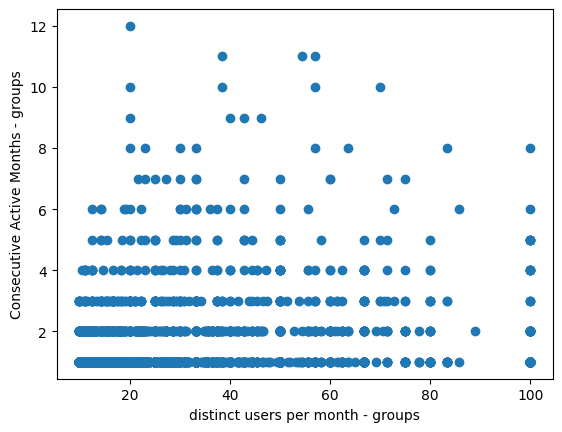

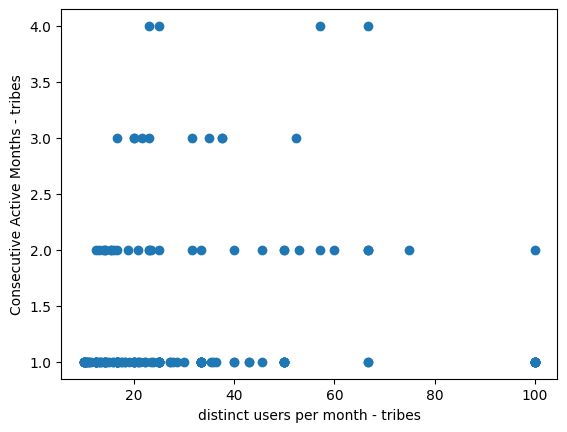

In [ ]:
# Graphique de dispersion

plt.scatter(df_groups_actives['distinct_users_per_month'], df_groups_actives['consecutive_active_months'])
plt.xlabel('distinct users per month - groups')
plt.ylabel('Consecutive Active Months - groups')
plt.show()

plt.scatter(df_tribes_actives['distinct_users_per_month'], df_tribes_actives['consecutive_active_months'])
plt.xlabel('distinct users per month - tribes')
plt.ylabel('Consecutive Active Months - tribes')
plt.show()

<ipython-input-54-753ae65da204>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_groups_actives['Account Category'], shade=True)


TypeError: ignored

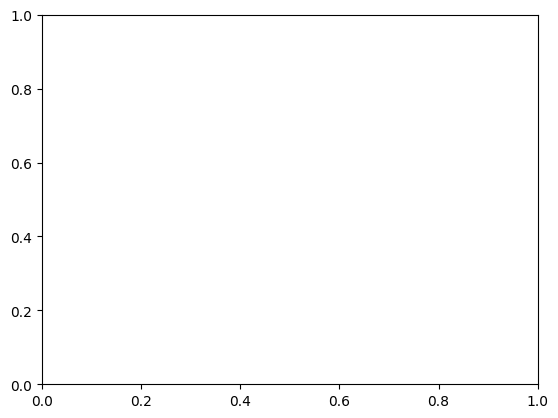

In [ ]:
sns.kdeplot(df_groups_actives['Account Category'], shade=True)
plt.xlabel('Account Category - groups')
plt.ylabel('Densité - groups')
plt.show()

sns.kdeplot(df_tribes_actives['Account Category'], shade=True)
plt.xlabel('Account Category - tribes')
plt.ylabel('Densité - tribes')
plt.show()

In [ ]:
print(groups_encoded['Total Employees'])

In [ ]:
corrHeat = groups_encoded.loc[:,['registered', 'interactions_per_month', 'posts_per_month','comments_per_month','users+2_interactions','consecutive_active_months']].corr()
sns.heatmap(corrHeat, xticklabels=corrHeat.columns, yticklabels=corrHeat.columns, annot=True)
plt.show()

corrHeat = groups_encoded.loc[:,['Max Potential Users', 'Account Category_Middle', 'Account Category_SMB', 'Account Category_Strategic','Company_Language_EN','Company_Language_ES','Company_Language_FR','consecutive_active_months']].corr()
sns.heatmap(corrHeat, xticklabels=corrHeat.columns, yticklabels=corrHeat.columns, annot=True)
plt.show()

## Courbe de corrélation entre % actifs à M0 et % actifs à M+3 - Pour la 1ère fois que les 10% sont atteints our chaque conversation - Pas pertinent, ne pas utiliser

In [ ]:
# On crée un nouveau dataset avec seulement les infos qui nous intéressent

actifs_groups = df_users_per_group_test.copy()
actifs_groups = actifs_groups.loc[:, ['lowest_level_id','year_month','distinct_users_per_month','consecutive_active_months']]

In [ ]:
# Création d'un DataFrame vide pour stocker les données finales
actifs_groups_bis = pd.DataFrame(columns=actifs_groups.columns)
actifs_groups_bis['year_month+3'] = ""
actifs_groups_bis['distinct_users_per_month+3'] = ""

# Pour chaque conversation
for conv_id in actifs_groups['lowest_level_id'].unique():

    # Sélectionner toutes les lignes correspondantes à la conversation
    conv_data = actifs_groups[actifs_groups['lowest_level_id'] == conv_id]

    # Trouver le mois où la conversation a atteint 10 distinct_users_per_month pour la première fois
    conv_first_month = conv_data[conv_data['distinct_users_per_month'] >= 10]['year_month'].min()

    # Si la conversation n'a jamais atteint 10 distinct_users_per_month, passer à la conversation suivante
    if pd.isna(conv_first_month):
        continue

    # Ajouter cette ligne au DataFrame final
    actifs_groups_bis = actifs_groups_bis.append(conv_data[conv_data['year_month'] == conv_first_month])

    # Calculer le mois 3 mois plus tard
    date_obj = datetime.strptime(conv_first_month, '%Y-%m-%d').date()
    conv_next_month = date_obj + relativedelta(months=3)
    conv_next_month = conv_next_month.strftime('%Y-%m-%d')

    # Vérifier que le mois suivant existe dans les données
    if conv_next_month not in conv_data['year_month'].values:
        continue

    # Ajouter la valeur de distinct_users_per_month pour le mois suivant
    next_month_value = conv_data[conv_data['year_month'] == conv_next_month]['distinct_users_per_month'].iloc[0]

    # Remplir la colonne year_month+3 pour la conversation sélectionnée
    actifs_groups_bis.loc[actifs_groups_bis['lowest_level_id'] == conv_id, 'year_month+3'] = conv_next_month

    # Remplir la colonne distinct_users_per_month+3 pour la conversation sélectionnée
    actifs_groups_bis.loc[actifs_groups_bis['lowest_level_id'] == conv_id, 'distinct_users_per_month+3'] = next_month_value

# Supprimer les lignes contenant des valeurs manquantes
actifs_groups_bis.dropna(inplace=True)

<ipython-input-26-fc88f390991d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actifs_groups_bis = actifs_groups_bis.append(conv_data[conv_data['year_month'] == conv_first_month])
<ipython-input-26-fc88f390991d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actifs_groups_bis = actifs_groups_bis.append(conv_data[conv_data['year_month'] == conv_first_month])
<ipython-input-26-fc88f390991d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actifs_groups_bis = actifs_groups_bis.append(conv_data[conv_data['year_month'] == conv_first_month])
<ipython-input-26-fc88f390991d>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  actifs_groups

KeyboardInterrupt: ignored

In [ ]:
# Création du nouveau df pour la visualisation des résultats

actifs_groups_courbe = pd.DataFrame(columns=["tranches", "moyenne_3_mois", "mediane_non_nulle_3_mois", "moyenne_non_nulle_3_mois"])

# Remplissage de la colonne "tranches"
for i in range(10, 100, 10):
    tranches = f"{i}-{i+10}"
    actifs_groups_courbe = actifs_groups_courbe.append({"tranches": tranches}, ignore_index=True)
print(actifs_groups_courbe)

In [ ]:
# Remplissage des valeurs moyennes

for i in actifs_groups_courbe['tranches'][0:8] :
  if len(actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])>0:
    n = len(actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])
    moy = actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5].mean()
    actifs_groups_courbe.loc[actifs_groups_courbe['tranches'] == i, 'moyenne_3_mois'] = moy
    print(i, moy)

In [ ]:
# Remplissage des valeurs medianes parmi les valeurs non nulles

for i in actifs_groups_courbe['tranches'][0:8] :
  if len(actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:])) & (actifs_groups_bis['distinct_users_per_month+3'] > 0)].iloc[:,5])>0:
    n = len(actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:])) & (actifs_groups_bis['distinct_users_per_month+3'] > 0)].iloc[:,5])
    med = actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:])) & (actifs_groups_bis['distinct_users_per_month+3'] > 0)].iloc[:,5].median()
    actifs_groups_courbe.loc[actifs_groups_courbe['tranches'] == i, 'mediane_non_nulle_3_mois'] = med
    print(i, n, med)

In [ ]:
# Remplissage des valeurs moyennes parmi les valeurs non nulles

for i in actifs_groups_courbe['tranches'][0:8] :
  if len(actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:])) & (actifs_groups_bis['distinct_users_per_month+3'] > 0)].iloc[:,5])>0:
    n = len(actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:])) & (actifs_groups_bis['distinct_users_per_month+3'] > 0)].iloc[:,5])
    moy = actifs_groups_bis[(actifs_groups_bis['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis['distinct_users_per_month'] < int(i[-2:])) & (actifs_groups_bis['distinct_users_per_month+3'] > 0)].iloc[:,5].mean()
    actifs_groups_courbe.loc[actifs_groups_courbe['tranches'] == i, 'moyenne_non_nulle_3_mois'] = moy
    print(i, n, med)

In [ ]:
actifs_groups_courbe.dropna(inplace=True)
print(actifs_groups_courbe)

In [ ]:
# Créer une liste pour les tranches
tranches = actifs_groups_courbe['tranches']

# Créer une liste pour les valeurs de 3 mois
moyenne_3_mois = actifs_groups_courbe['moyenne_3_mois']

# Tracer la courbe
plt.plot(tranches, moyenne_3_mois)

# Afficher la courbe
plt.show()

In [ ]:
# Créer une liste pour les tranches
tranches = actifs_groups_courbe['tranches']

# Créer une liste pour les valeurs de 3 mois
mediane_non_nulle_3_mois = actifs_groups_courbe['mediane_non_nulle_3_mois']

# Tracer la courbe
plt.plot(tranches, mediane_non_nulle_3_mois)

# Afficher la courbe
plt.show()

In [ ]:
# Créer une liste pour les tranches
tranches = actifs_groups_courbe['tranches']

# Créer une liste pour les valeurs de 3 mois
moyenne_non_nulle_3_mois = actifs_groups_courbe['moyenne_non_nulle_3_mois']

# Tracer la courbe
plt.plot(tranches, moyenne_non_nulle_3_mois)

# Afficher la courbe
plt.show()

## Courbe de corrélation entre % actifs à M0 et % actifs à M+3 - Pour chaque fois que les 10% sont atteints

In [ ]:
# On crée un nouveau dataset avec seulement les infos qui nous intéressent

actifs_groups = df_users_per_group_test.copy()
actifs_groups = actifs_groups.loc[:, ['lowest_level_id','year_month','distinct_users_per_month','consecutive_active_months']]

In [ ]:
# Création d'un DataFrame vide pour stocker les données finales
actifs_groups_bis_2 = pd.DataFrame(columns=actifs_groups.columns)
actifs_groups_bis_2['year_month+3'] = ""
actifs_groups_bis_2['distinct_users_per_month+3'] = ""

# Pour chaque conversation
for conv_id in actifs_groups['lowest_level_id'].unique():
    conv_data = actifs_groups[actifs_groups['lowest_level_id'] == conv_id]
    for conv_mois in conv_data['year_month'] :
      if conv_data.loc[conv_data['year_month'] == conv_mois, 'distinct_users_per_month'].values[0] >= 10:
        actifs_groups_bis_2 = actifs_groups_bis_2.append(conv_data[conv_data['year_month'] == conv_mois])
        date_obj = datetime.strptime(conv_mois, '%Y-%m-%d').date()
        conv_next_month = date_obj + relativedelta(months=3)
        conv_next_month = conv_next_month.strftime('%Y-%m-%d')
        if conv_next_month not in conv_data['year_month'].values:
          continue
        next_month_value = conv_data[conv_data['year_month'] == conv_next_month]['distinct_users_per_month'].iloc[0]
        actifs_groups_bis_2.loc[(actifs_groups_bis_2['lowest_level_id'] == conv_id) & (actifs_groups_bis_2['year_month'] == conv_mois), 'year_month+3'] = conv_next_month
        actifs_groups_bis_2.loc[(actifs_groups_bis_2['lowest_level_id'] == conv_id) & (actifs_groups_bis_2['year_month'] == conv_mois), 'distinct_users_per_month+3'] = next_month_value
actifs_groups_bis_2.dropna(inplace=True)

In [ ]:
print(actifs_groups_bis_2)

                 lowest_level_id  year_month  distinct_users_per_month  \
14      59ca43a60da688f1ac5c035a  2022-03-01                      16.7   
15      59ca43a60da688f1ac5c035a  2022-04-01                      25.0   
16      59ca43a60da688f1ac5c035a  2022-05-01                      16.1   
30      59ca44840da688f1ac5c956f  2022-03-01                      28.6   
58      59ca44a50da688f1ac5ca174  2022-02-01                      25.0   
...                          ...         ...                       ...   
119558  63caad5b80683bb9be9bb071  2023-01-01                      66.7   
119582  63caad5d80683bb9be9bb0a6  2023-01-01                      18.2   
119594  63caad5e80683bb9be9bb0b9  2023-01-01                      20.0   
119630  63caad6280683bb9be9bb11e  2023-01-01                      50.0   
119733  63d1247f76a9f6f18c3a33f3  2023-01-01                      20.0   

       consecutive_active_months year_month+3 distinct_users_per_month+3  
14                             3   2

In [ ]:
# Création du nouveau df pour la visualisation des résultats

actifs_groups_courbe_2 = pd.DataFrame(columns=["tranches", "moyenne_3_mois", "%actifs", "size"])

# Remplissage de la colonne "tranches"
for i in range(10, 60, 10):
    tranches = f"{i}-{i+10}"
    actifs_groups_courbe_2 = actifs_groups_courbe_2.append({"tranches": tranches}, ignore_index=True)
print(actifs_groups_courbe_2)

In [ ]:
# Remplissage des valeurs moyennes

for i in actifs_groups_courbe_2['tranches'][0:8] :
  if len(actifs_groups_bis_2[(actifs_groups_bis_2['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis_2['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])>0:
    n = len(actifs_groups_bis_2[(actifs_groups_bis_2['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis_2['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])
    moy = actifs_groups_bis_2[(actifs_groups_bis_2['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis_2['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5].mean()
    actifs_groups_courbe_2.loc[actifs_groups_courbe_2['tranches'] == i, 'moyenne_3_mois'] = moy
    actifs_groups_courbe_2.loc[actifs_groups_courbe_2['tranches'] == i, 'size'] = n
    print(i, n, moy)
"""actifs_groups_courbe_2.to_csv('toutes_entreprises.csv', index = False)
files.download('toutes_entreprises.csv')"""

In [ ]:
# Remplissage du % de conversations perdurant

for i in actifs_groups_courbe_2['tranches'][0:8] :
  if len(actifs_groups_bis_2[(actifs_groups_bis_2['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis_2['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])>0:
    n = len(actifs_groups_bis_2[(actifs_groups_bis_2['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis_2['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])
    pourcentage_perdure = actifs_groups_bis_2[(actifs_groups_bis_2['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_bis_2['distinct_users_per_month'] < int(i[-2:]))]
    pourcentage_perdure = len(pourcentage_perdure[pourcentage_perdure['distinct_users_per_month+3'] >= 10])/len(pourcentage_perdure)
    actifs_groups_courbe_2.loc[actifs_groups_courbe_2['tranches'] == i, '%actifs'] = pourcentage_perdure
    actifs_groups_courbe_2.loc[actifs_groups_courbe_2['tranches'] == i, 'size'] = n
    print(i, n, pourcentage_perdure)

10-20 1310 0.07862595419847328
20-30 748 0.11497326203208556
30-40 430 0.1325581395348837
40-50 213 0.14553990610328638
50-60 284 0.17253521126760563


In [ ]:
actifs_groups_courbe_2.dropna(inplace=True)
print(actifs_groups_courbe_2)

  tranches moyenne_3_mois   %actifs  size
0    10-20        2.04374  0.078626  1310
1    20-30       3.134759  0.114973   748
2    30-40       3.684884  0.132558   430
3    40-50       4.168075   0.14554   213
4    50-60       5.992254  0.172535   284


In [ ]:
"""actifs_groups_courbe_2.to_csv('actifs_groups_courbe_2.csv', index=False)
files.download('actifs_groups_courbe_2.csv')"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Courbe de corrélation entre % actifs à M0 et % actifs à M+3 - Pour chaque fois que les 10% sont atteints - Account category

In [ ]:
# On crée un nouveau dataset avec seulement les infos qui nous intéressent

actifs_groups = df_users_per_group_test.copy()
actifs_groups = actifs_groups.loc[:, ['lowest_level_id','year_month','Account Category', 'distinct_users_per_month','consecutive_active_months']]
actifs_groups = actifs_groups[actifs_groups['Account Category'] != 'No_data']
print(actifs_groups)

                 lowest_level_id  year_month Account Category  \
12      59ca43a60da688f1ac5c035a  2022-01-01              SMB   
13      59ca43a60da688f1ac5c035a  2022-02-01              SMB   
14      59ca43a60da688f1ac5c035a  2022-03-01              SMB   
15      59ca43a60da688f1ac5c035a  2022-04-01              SMB   
16      59ca43a60da688f1ac5c035a  2022-05-01              SMB   
...                          ...         ...              ...   
121251  6425a07ee57c80817e82209a  2023-04-01              SMB   
121252  642a92b81976c00dcf970cec  2023-04-01        Strategic   
121254  642be1d3d4f5dbbe6d8a77fd  2023-04-01        Strategic   
121259  642fe75aa50fc2135607b063  2023-04-01           Middle   
121262  64356b4cc36bee34bb66a59b  2023-04-01        Strategic   

        distinct_users_per_month  consecutive_active_months  
12                           6.7                          0  
13                           4.3                          0  
14                          16.7 

In [ ]:
# Création de DataFrames vides pour stocker les données finales pour chaque catégorie de compte
actifs_groups_SMB = pd.DataFrame(columns=actifs_groups.columns)
actifs_groups_SMB['year_month+3'] = ""
actifs_groups_SMB['distinct_users_per_month+3'] = ""

actifs_groups_Middle = pd.DataFrame(columns=actifs_groups.columns)
actifs_groups_Middle['year_month+3'] = ""
actifs_groups_Middle['distinct_users_per_month+3'] = ""

actifs_groups_Strategic = pd.DataFrame(columns=actifs_groups.columns)
actifs_groups_Strategic['year_month+3'] = ""
actifs_groups_Strategic['distinct_users_per_month+3'] = ""

# Pour chaque conversation
for conv_id in actifs_groups['lowest_level_id'].unique():
    conv_data = actifs_groups[actifs_groups['lowest_level_id'] == conv_id]

    # Séparation des données en fonction de la catégorie de compte
    if conv_data['Account Category'].values[0] == 'SMB':
      for conv_mois in conv_data['year_month'] :
          if conv_data.loc[conv_data['year_month'] == conv_mois, 'distinct_users_per_month'].values[0] >= 10:
              actifs_groups_SMB = actifs_groups_SMB.append(conv_data[conv_data['year_month'] == conv_mois])
              date_obj = datetime.strptime(conv_mois, '%Y-%m-%d').date()
              conv_next_month = date_obj + relativedelta(months=3)
              conv_next_month = conv_next_month.strftime('%Y-%m-%d')
              if conv_next_month not in conv_data['year_month'].values:
                  continue
              next_month_value = conv_data[conv_data['year_month'] == conv_next_month]['distinct_users_per_month'].iloc[0]
              actifs_groups_SMB.loc[(actifs_groups_SMB['lowest_level_id'] == conv_id) & (actifs_groups_SMB['year_month'] == conv_mois), 'year_month+3'] = conv_next_month
              actifs_groups_SMB.loc[(actifs_groups_SMB['lowest_level_id'] == conv_id) & (actifs_groups_SMB['year_month'] == conv_mois), 'distinct_users_per_month+3'] = next_month_value
    elif conv_data['Account Category'].values[0] == 'Middle':
      for conv_mois in conv_data['year_month'] :
          if conv_data.loc[conv_data['year_month'] == conv_mois, 'distinct_users_per_month'].values[0] >= 10:
              actifs_groups_Middle = actifs_groups_Middle.append(conv_data[conv_data['year_month'] == conv_mois])
              date_obj = datetime.strptime(conv_mois, '%Y-%m-%d').date()
              conv_next_month = date_obj + relativedelta(months=3)
              conv_next_month = conv_next_month.strftime('%Y-%m-%d')
              if conv_next_month not in conv_data['year_month'].values:
                  continue
              next_month_value = conv_data[conv_data['year_month'] == conv_next_month]['distinct_users_per_month'].iloc[0]
              actifs_groups_Middle.loc[(actifs_groups_Middle['lowest_level_id'] == conv_id) & (actifs_groups_Middle['year_month'] == conv_mois), 'year_month+3'] = conv_next_month
              actifs_groups_Middle.loc[(actifs_groups_Middle['lowest_level_id'] == conv_id) & (actifs_groups_Middle['year_month'] == conv_mois), 'distinct_users_per_month+3'] = next_month_value
    else:
      for conv_mois in conv_data['year_month'] :
          if conv_data.loc[conv_data['year_month'] == conv_mois, 'distinct_users_per_month'].values[0] >= 10:
              actifs_groups_Strategic = actifs_groups_Strategic.append(conv_data[conv_data['year_month'] == conv_mois])
              date_obj = datetime.strptime(conv_mois, '%Y-%m-%d').date()
              conv_next_month = date_obj + relativedelta(months=3)
              conv_next_month = conv_next_month.strftime('%Y-%m-%d')
              if conv_next_month not in conv_data['year_month'].values:
                  continue
              next_month_value = conv_data[conv_data['year_month'] == conv_next_month]['distinct_users_per_month'].iloc[0]
              actifs_groups_Strategic.loc[(actifs_groups_Strategic['lowest_level_id'] == conv_id) & (actifs_groups_Strategic['year_month'] == conv_mois), 'year_month+3'] = conv_next_month
              actifs_groups_Strategic.loc[(actifs_groups_Strategic['lowest_level_id'] == conv_id) & (actifs_groups_Strategic['year_month'] == conv_mois), 'distinct_users_per_month+3'] = next_month_value

# Suppression des lignes avec des valeurs manquantes dans chaque DataFrame de catégorie de compte
actifs_groups_SMB.dropna(inplace=True)
actifs_groups_Middle.dropna(inplace=True)
actifs_groups_Strategic.dropna(inplace=True)

In [ ]:
# Création du nouveau df pour la visualisation des résultats

actifs_groups_courbe_SMB = pd.DataFrame(columns=["tranches", "moyenne_3_mois", "%actifs", "size"])

# Remplissage de la colonne "tranches"
for i in range(10, 100, 10):
    tranches = f"{i}-{i+10}"
    actifs_groups_courbe_SMB = actifs_groups_courbe_SMB.append({"tranches": tranches}, ignore_index=True)
print(actifs_groups_courbe_SMB)

# Création du nouveau df pour la visualisation des résultats

actifs_groups_courbe_Middle = pd.DataFrame(columns=["tranches", "moyenne_3_mois", "%actifs", "size"])

# Remplissage de la colonne "tranches"
for i in range(10, 100, 10):
    tranches = f"{i}-{i+10}"
    actifs_groups_courbe_Middle = actifs_groups_courbe_Middle.append({"tranches": tranches}, ignore_index=True)
print(actifs_groups_courbe_Middle)

# Création du nouveau df pour la visualisation des résultats

actifs_groups_courbe_Strategic = pd.DataFrame(columns=["tranches", "moyenne_3_mois", "%actifs", "size"])

# Remplissage de la colonne "tranches"
for i in range(10, 100, 10):
    tranches = f"{i}-{i+10}"
    actifs_groups_courbe_Strategic = actifs_groups_courbe_Strategic.append({"tranches": tranches}, ignore_index=True)
print(actifs_groups_courbe_Strategic)

In [ ]:
# Remplissage des valeurs moyennes

for i in actifs_groups_courbe_SMB['tranches'][0:8] :
  if len(actifs_groups_SMB[(actifs_groups_SMB['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_SMB['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6])>0:
    n = len(actifs_groups_SMB[(actifs_groups_SMB['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_SMB['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6])
    moy = actifs_groups_SMB[(actifs_groups_SMB['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_SMB['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6].mean()
    actifs_groups_courbe_SMB.loc[actifs_groups_courbe_SMB['tranches'] == i, 'moyenne_3_mois'] = moy
    actifs_groups_courbe_SMB.loc[actifs_groups_courbe_SMB['tranches'] == i, 'size'] = n
    print(i, moy)

# Remplissage des valeurs moyennes

for i in actifs_groups_courbe_Middle['tranches'][0:8] :
  if len(actifs_groups_Middle[(actifs_groups_Middle['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Middle['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6])>0:
    n = len(actifs_groups_Middle[(actifs_groups_Middle['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Middle['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6])
    moy = actifs_groups_Middle[(actifs_groups_Middle['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Middle['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6].mean()
    actifs_groups_courbe_Middle.loc[actifs_groups_courbe_Middle['tranches'] == i, 'moyenne_3_mois'] = moy
    actifs_groups_courbe_Middle.loc[actifs_groups_courbe_Middle['tranches'] == i, 'size'] = n
    print(i, moy)

# Remplissage des valeurs moyennes

for i in actifs_groups_courbe_Strategic['tranches'][0:8] :
  if len(actifs_groups_Strategic[(actifs_groups_Strategic['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Strategic['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6])>0:
    n = len(actifs_groups_Strategic[(actifs_groups_Strategic['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Strategic['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6])
    moy = actifs_groups_Strategic[(actifs_groups_Strategic['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Strategic['distinct_users_per_month'] < int(i[-2:]))].iloc[:,6].mean()
    actifs_groups_courbe_Strategic.loc[actifs_groups_courbe_Strategic['tranches'] == i, 'moyenne_3_mois'] = moy
    actifs_groups_courbe_Strategic.loc[actifs_groups_courbe_Strategic['tranches'] == i, 'size'] = n
    print(i, moy)

# Remplissage du % de conversations perdurant

for i in actifs_groups_courbe_SMB['tranches'][0:8] :
  if len(actifs_groups_SMB[(actifs_groups_SMB['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_SMB['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])>0:
    n = len(actifs_groups_SMB[(actifs_groups_SMB['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_SMB['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])
    pourcentage_perdure = actifs_groups_SMB[(actifs_groups_SMB['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_SMB['distinct_users_per_month'] < int(i[-2:]))]
    pourcentage_perdure = len(pourcentage_perdure[pourcentage_perdure['distinct_users_per_month+3'] >= 10])/len(pourcentage_perdure)
    actifs_groups_courbe_SMB.loc[actifs_groups_courbe_SMB['tranches'] == i, '%actifs'] = pourcentage_perdure
    actifs_groups_courbe_SMB.loc[actifs_groups_courbe_SMB['tranches'] == i, 'size'] = n
    print(i, n, pourcentage_perdure)

# Remplissage du % de conversations perdurant

for i in actifs_groups_courbe_Middle['tranches'][0:8] :
  if len(actifs_groups_Middle[(actifs_groups_Middle['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Middle['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])>0:
    n = len(actifs_groups_Middle[(actifs_groups_Middle['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Middle['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])
    pourcentage_perdure = actifs_groups_Middle[(actifs_groups_Middle['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Middle['distinct_users_per_month'] < int(i[-2:]))]
    pourcentage_perdure = len(pourcentage_perdure[pourcentage_perdure['distinct_users_per_month+3'] >= 10])/len(pourcentage_perdure)
    actifs_groups_courbe_Middle.loc[actifs_groups_courbe_Middle['tranches'] == i, '%actifs'] = pourcentage_perdure
    actifs_groups_courbe_Middle.loc[actifs_groups_courbe_Middle['tranches'] == i, 'size'] = n
    print(i, n, pourcentage_perdure)

# Remplissage du % de conversations perdurant

for i in actifs_groups_courbe_Strategic['tranches'][0:8] :
  if len(actifs_groups_Strategic[(actifs_groups_Strategic['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Strategic['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])>0:
    n = len(actifs_groups_Strategic[(actifs_groups_Strategic['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Strategic['distinct_users_per_month'] < int(i[-2:]))].iloc[:,5])
    pourcentage_perdure = actifs_groups_Strategic[(actifs_groups_Strategic['distinct_users_per_month'] >= int(i[:2])) & (actifs_groups_Strategic['distinct_users_per_month'] < int(i[-2:]))]
    pourcentage_perdure = len(pourcentage_perdure[pourcentage_perdure['distinct_users_per_month+3'] >= 10])/len(pourcentage_perdure)
    actifs_groups_courbe_Strategic.loc[actifs_groups_courbe_Strategic['tranches'] == i, '%actifs'] = pourcentage_perdure
    actifs_groups_courbe_Strategic.loc[actifs_groups_courbe_Strategic['tranches'] == i, 'size'] = n
    print(i, n, pourcentage_perdure)

In [ ]:
# On supprime les dernières tranches qui ne sont pas assez fournies

actifs_groups_courbe_SMB = actifs_groups_courbe_SMB[:-3]
actifs_groups_courbe_Middle = actifs_groups_courbe_Middle[:-3]
actifs_groups_courbe_Strategic = actifs_groups_courbe_Strategic[:-3]
print(actifs_groups_courbe_SMB, " ", " ", actifs_groups_courbe_Middle, " ", " ", actifs_groups_courbe_Strategic, " ", " ")

  tranches moyenne_3_mois   %actifs size
0    10-20       3.157143  0.097959  245
1    20-30       3.905263  0.157895  171
2    30-40       4.314754  0.163934  122
3    40-50       6.713846  0.215385   65
4    50-60          5.975     0.175   80
5    60-70       3.293617   0.12766   47       tranches moyenne_3_mois   %actifs size
0    10-20       2.585714  0.105714  350
1    20-30       2.703261  0.097826  184
2    30-40       2.617647  0.107843  102
3    40-50       4.291667  0.166667   60
4    50-60      10.232308  0.261538   65
5    60-70           4.35       0.2   30       tranches moyenne_3_mois   %actifs size
0    10-20       1.443168  0.062112  644
1    20-30          2.665  0.102941  340
2    30-40       3.774444  0.122222  180
3    40-50       1.855263  0.065789   76
4    50-60       2.372321  0.080357  112
5    60-70       3.959677  0.096774   62    


In [ ]:
"""actifs_groups_courbe_SMB.to_csv('actifs_groups_courbe_SMB.csv', index=False)
files.download('actifs_groups_courbe_SMB.csv')
actifs_groups_courbe_Middle.to_csv('actifs_groups_courbe_Middle.csv', index=False)
files.download('actifs_groups_courbe_Middle.csv')
actifs_groups_courbe_Strategic.to_csv('actifs_groups_courbe_Strategic.csv', index=False)
files.download('actifs_groups_courbe_Strategic.csv')"""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recherche de conversations modèles afin de visualiser les bonnes pratiques

In [ ]:
df_users_per_group_test.head()

,lowest_level_id,level_0_id,level_1_id,quarter,month,year_month,month_rank,registered,Name,Total Employees,...,Company_Language,Max Potential Users,interactions_per_month,posts_per_month,comments_per_month,reactions_per_month,distinct_users_per_month,users+2_interactions,is_active,consecutive_active_months
0,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q1,2022-01,2022-01-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q1,2022-02,2022-02-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q1,2022-03,2022-03-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q2,2022-04,2022-04-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,58aea22cbf4d1db14a862976,2022-Q2,2022-05,2022-05-01,1,12,No_data,No_data,...,No_data,No_data,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [ ]:
# On recherche une conversation, à un mois donné, qui respecte les conditions suivantes :
# Pas le premier mois en activité
# >= 20 membres dans la conversation
# >= 20% d'actifs à M0
# >= 20% d'actifs à M+3
# >= 50 employés dans l'entreprise

df_best_practices = df_users_per_group_test.copy()#[df_users_per_group_test['Total Employees'] != 'No_data']
#df_best_practices['Total Employees'] = df_best_practices['Total Employees'].astype(int)
df_best_practices = df_best_practices[(df_best_practices['registered'] >= 10) & (df_best_practices['interactions_per_month'] >= 10)]# & (df_best_practices['Total Employees'] >= 50)]

df_best_practices_bis = pd.DataFrame(columns=df_best_practices.columns)
df_best_practices_bis['year_month+3'] = ""
df_best_practices_bis['distinct_users_per_month+3'] = ""

# Pour chaque conversation
for conv_id in df_best_practices['lowest_level_id'].unique():
    conv_data = df_best_practices[df_best_practices['lowest_level_id'] == conv_id]
    for conv_mois in conv_data['year_month'] :
      if conv_data.loc[conv_data['year_month'] == conv_mois, 'distinct_users_per_month'].values[0] >= 20:
        df_best_practices_bis = df_best_practices_bis.append(conv_data[conv_data['year_month'] == conv_mois])
        date_obj = datetime.strptime(conv_mois, '%Y-%m-%d').date()
        conv_next_month = date_obj + relativedelta(months=3)
        conv_next_month = conv_next_month.strftime('%Y-%m-%d')
        if conv_next_month not in conv_data['year_month'].values:
          continue
        next_month_value = conv_data[conv_data['year_month'] == conv_next_month]['distinct_users_per_month'].iloc[0]
        if next_month_value >= 10 :
          df_best_practices_bis.loc[(df_best_practices_bis['lowest_level_id'] == conv_id) & (df_best_practices_bis['year_month'] == conv_mois), 'year_month+3'] = conv_next_month
          df_best_practices_bis.loc[(df_best_practices_bis['lowest_level_id'] == conv_id) & (df_best_practices_bis['year_month'] == conv_mois), 'distinct_users_per_month+3'] = next_month_value
df_best_practices_bis.dropna(inplace=True)

#print(df_best_practices)

In [ ]:
print(df_best_practices_bis)
"""df_best_practices_bis.to_csv('best_practices.csv', index=False)
files.download("best_practices.csv")"""

*Donc à priori seulement 1 conversation d'Unilabs correspond à ces critères, il faut maintenant rentrer dans son détail afin d'en tirer des enseignements*

## Algorithme de prédiction faisant le lien entre les caractéristiques d'un groupe et sa continuité

In [ ]:
# Modèle de régression linéaire afin de prédire 'interactions_per_month' grâce aux colonnes :
# 'registered', 'Account Category' et 'Company_Language'

# Séparation des données en ensembles de formation et de test
X = df_groups_actives[['registered', 'Account Category', 'Company_Language']]
y = df_groups_actives['interactions_per_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisation des données si nécessaire

# Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluation du modèle
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

NameError: ignored